In [1]:
%matplotlib notebook
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [3]:
counts = pd.read_table("../doublets-dataset/dataset1/Ye2_L001_001_train.dge.txt.gz", index_col=0)
barcodes = set(counts.columns.tolist())

In [6]:
labels = pd.read_table("../doublets-dataset/dataset1/Ye2_L001_001_train_labels.txt", header=None, index_col=0)
labels.columns = ['label']
labels = labels['label']
singlets = labels.index[labels == 'singlet'] & counts.columns
doublets = labels.index[labels == 'doublet'] & counts.columns
counts = counts.loc[:, singlets | doublets]

In [75]:
meta = pd.read_table("../doublets-dataset/dataset1/Ye2_L001_001_train_tagged.metrics", skiprows=2)
meta = meta.set_index('SAMPLE').drop(['LIBRARY', 'READ_GROUP'], axis=1)
meta = meta.loc[counts.columns]
meta.head()

,PF_BASES,PF_ALIGNED_BASES,RIBOSOMAL_BASES,CODING_BASES,UTR_BASES,INTRONIC_BASES,INTERGENIC_BASES,IGNORED_READS,CORRECT_STRAND_READS,INCORRECT_STRAND_READS,...,PCT_UTR_BASES,PCT_INTRONIC_BASES,PCT_INTERGENIC_BASES,PCT_MRNA_BASES,PCT_USABLE_BASES,PCT_CORRECT_STRAND_READS,MEDIAN_CV_COVERAGE,MEDIAN_5PRIME_BIAS,MEDIAN_3PRIME_BIAS,MEDIAN_5PRIME_TO_3PRIME_BIAS
AAACCTGAGAAGGCCT,438746,419143,NaN,168872,126102,87475,36694,0,0,0,...,0.300857,0.208700,0.087545,0.703755,0.672312,0,0,0,0,0
AAACCTGAGAGCTGCA,1069278,1048020,NaN,350625,228587,389599,79209,0,0,0,...,0.218113,0.371748,0.075580,0.552673,0.541685,0,0,0,0,0
AAACCTGAGAGTCTGG,906794,876016,NaN,333892,226582,238469,77073,0,0,0,...,0.258651,0.272220,0.087981,0.639799,0.618083,0,0,0,0,0
AAACCTGAGGATGCGT,1007832,979303,NaN,345518,223381,335549,74855,0,0,0,...,0.228102,0.342641,0.076437,0.580922,0.564478,0,0,0,0,0
AAACCTGAGTTCGCAT,475594,463742,NaN,158853,100967,146857,57065,0,0,0,...,0.217722,0.316678,0.123053,0.560268,0.546306,0,0,0,0,0


In [76]:
num_genes = (counts > 0).sum(axis=0).rename('NUM_GENES')
meta = meta.join(num_genes)
meta.head()

num_genes = (counts).sum(axis=0).rename('NUM_UMI')
meta = meta.join(num_genes)
meta.head()

,PF_BASES,PF_ALIGNED_BASES,RIBOSOMAL_BASES,CODING_BASES,UTR_BASES,INTRONIC_BASES,INTERGENIC_BASES,IGNORED_READS,CORRECT_STRAND_READS,INCORRECT_STRAND_READS,...,PCT_INTERGENIC_BASES,PCT_MRNA_BASES,PCT_USABLE_BASES,PCT_CORRECT_STRAND_READS,MEDIAN_CV_COVERAGE,MEDIAN_5PRIME_BIAS,MEDIAN_3PRIME_BIAS,MEDIAN_5PRIME_TO_3PRIME_BIAS,NUM_GENES,NUM_UMI
AAACCTGAGAAGGCCT,438746,419143,NaN,168872,126102,87475,36694,0,0,0,...,0.087545,0.703755,0.672312,0,0,0,0,0,753,1775
AAACCTGAGAGCTGCA,1069278,1048020,NaN,350625,228587,389599,79209,0,0,0,...,0.075580,0.552673,0.541685,0,0,0,0,0,1194,3352
AAACCTGAGAGTCTGG,906794,876016,NaN,333892,226582,238469,77073,0,0,0,...,0.087981,0.639799,0.618083,0,0,0,0,0,1233,3285
AAACCTGAGGATGCGT,1007832,979303,NaN,345518,223381,335549,74855,0,0,0,...,0.076437,0.580922,0.564478,0,0,0,0,0,1255,3323
AAACCTGAGTTCGCAT,475594,463742,NaN,158853,100967,146857,57065,0,0,0,...,0.123053,0.560268,0.546306,0,0,0,0,0,592,1539


In [52]:
def classifier(meta, thresh):
    result = ['singlet' if meta.NUM_GENES[x] < thresh else 'doublet' for x in meta.index]
    result = pd.Series(result, meta.index)
    return result

def score(labels, pred):
    FN = 0
    TN = 0
    FP = 0
    TP = 0
    N = labels.shape[0]
    pos = (labels == 'doublet').sum()
    neg = (labels == 'singlet').sum()
    for x in labels.index:
        if labels[x] == 'singlet' and pred[x] == 'singlet':
            TN += 1
        if labels[x] == 'singlet' and pred[x] == 'doublet':
            FP += 1
        if labels[x] == 'doublet' and pred[x] == 'doublet':
            TP += 1
        if labels[x] == 'doublet' and pred[x] == 'singlet':
            FN += 1
            
            
    result = {'FP': FP, 'TN': TN, 'TP': TP, 'FN': FN,
             'Accuracy': (TP + TN) / (TP + TN + FP + FN),
             'Precision': TP / (TP + FP),
             'Recall': TP / (TP + FN)}
    
    return result

In [53]:
pred = classifier(meta, 1000)
scores = score(labels, pred)


In [54]:
from tqdm import tqdm
thresholds = np.linspace(0, 2500, 50)
scores = []
for thresh in tqdm(thresholds):
    pred = classifier(meta, thresh)
    scores.append(score(labels, pred))
    

100%|██████████| 50/50 [00:38<00:00,  1.32it/s]


<IPython.core.display.Javascript object>


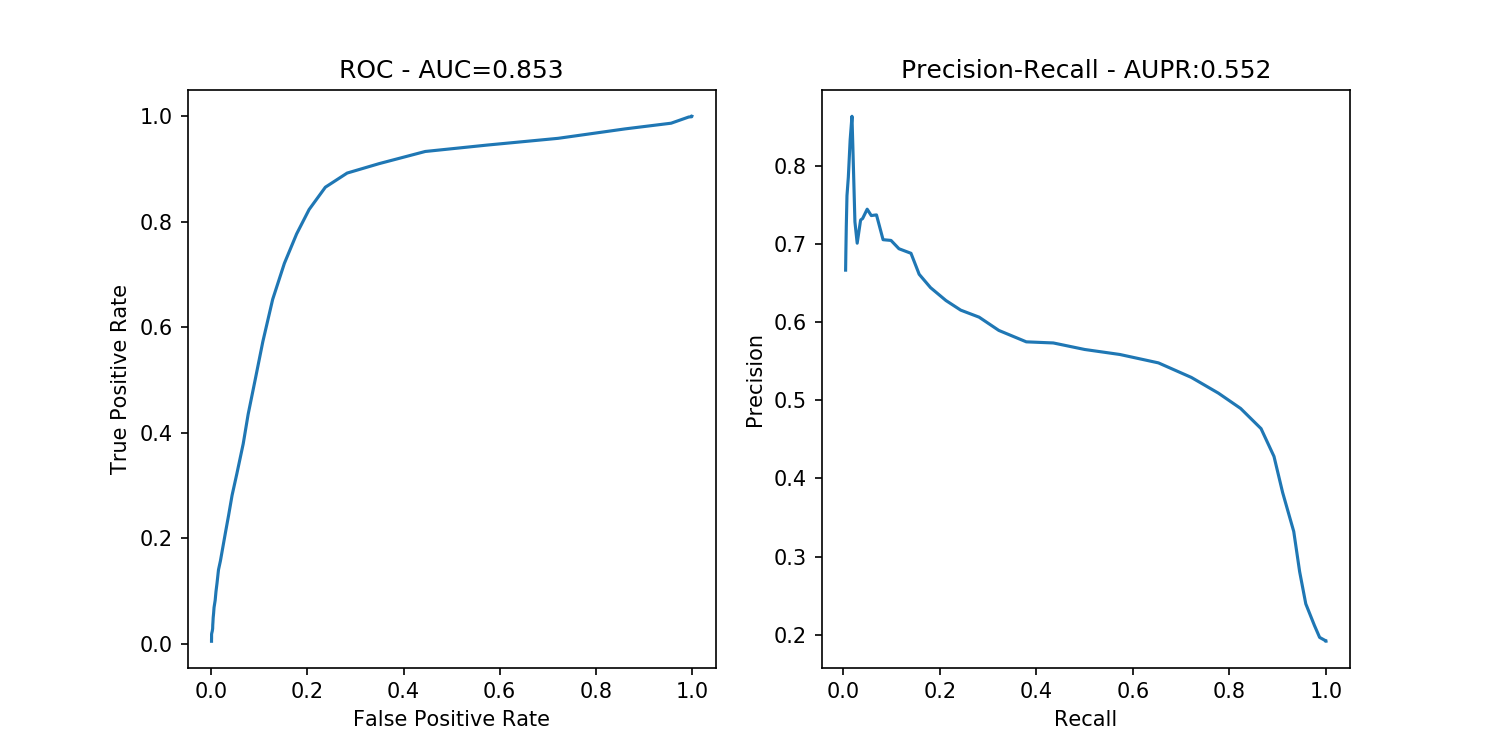

In [105]:
tpr = [x['TP'] / (x['TP'] + x['FN']) for x in scores]
fpr = [x['FP'] / (x['FP'] + x['TN']) for x in scores]
precision = [x['Precision'] for x in scores]
recall = [x['Recall'] for x in scores]

total = 0
for i in np.arange(len(tpr)-1):
    y2 = tpr[i+1]
    y1 = tpr[i]
    x2 = fpr[i+1]
    x1 = fpr[i]
    
    total += (y2+y1)*abs(x2-x1)/2
    
auc = total

total = 0
for i in np.arange(len(recall)-1):
    y2 = precision[i+1]
    y1 = precision[i]
    x2 = recall[i+1]
    x1 = recall[i]
    
    total += (y2+y1)*abs(x2-x1)/2

aupr = total


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(ax1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC={:.3f}'.format(auc))

plt.sca(ax2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall - AUPR:{:.3f}'.format(aupr))

In [56]:
# calculate auc



0.85339029007357858

<IPython.core.display.Javascript object>


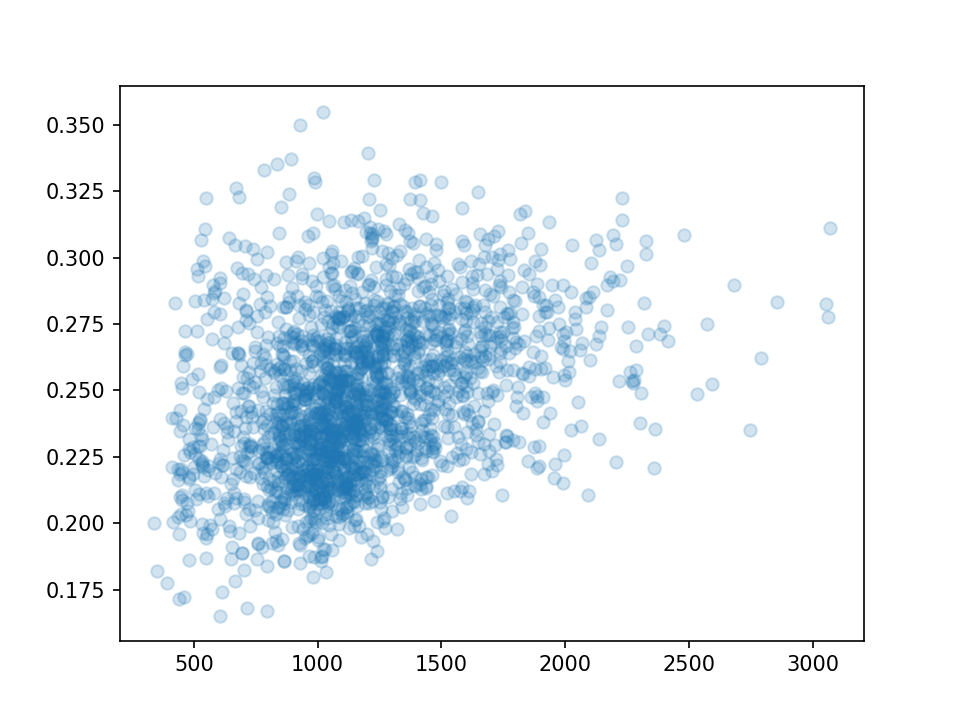

In [64]:
plt.figure()

#plt.plot(meta.NUM_GENES[singlets], meta.PCT_CODING_BASES[singlets], 'o', label='singlets', alpha=.2)

plt.plot(meta.NUM_GENES[doublets], meta.PCT_UTR_BASES[doublets], 'o', label='singlets', alpha=.2)

In [65]:
meta.columns

Index(['PF_BASES', 'PF_ALIGNED_BASES', 'RIBOSOMAL_BASES', 'CODING_BASES',
       'UTR_BASES', 'INTRONIC_BASES', 'INTERGENIC_BASES', 'IGNORED_READS',
       'CORRECT_STRAND_READS', 'INCORRECT_STRAND_READS', 'PCT_RIBOSOMAL_BASES',
       'PCT_CODING_BASES', 'PCT_UTR_BASES', 'PCT_INTRONIC_BASES',
       'PCT_INTERGENIC_BASES', 'PCT_MRNA_BASES', 'PCT_USABLE_BASES',
       'PCT_CORRECT_STRAND_READS', 'MEDIAN_CV_COVERAGE', 'MEDIAN_5PRIME_BIAS',
       'MEDIAN_3PRIME_BIAS', 'MEDIAN_5PRIME_TO_3PRIME_BIAS', 'NUM_GENES'],
      dtype='object')

<IPython.core.display.Javascript object>


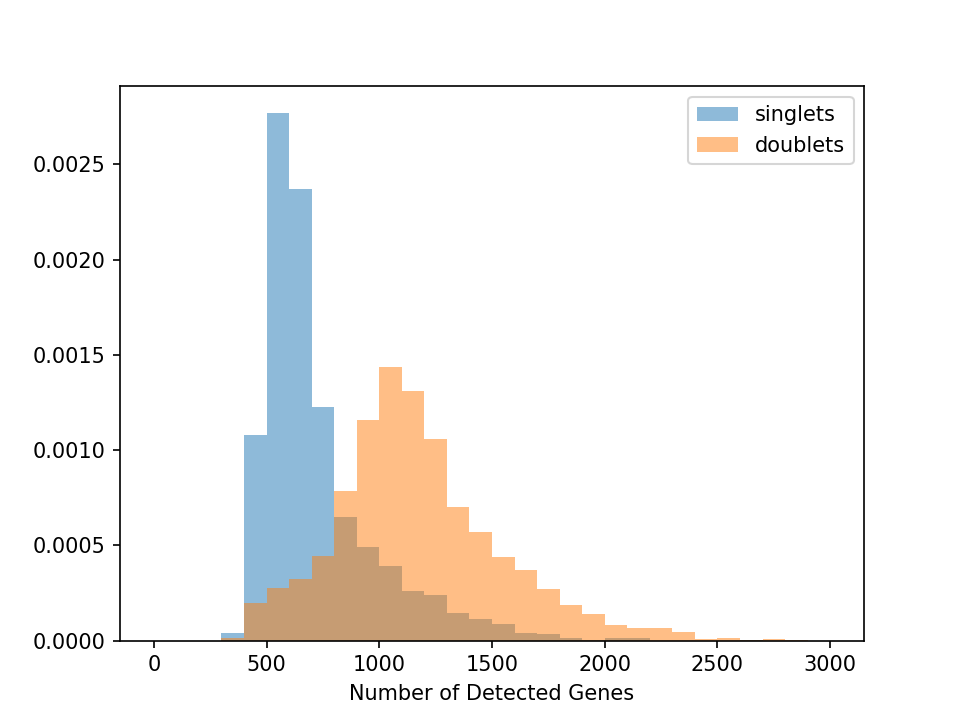

In [95]:
plt.figure()

feature = 'NUM_GENES'

plt.hist(meta[feature][singlets], 30, alpha=.5, range=(0, 3000), label='singlets', normed=True)
plt.hist(meta[feature][doublets], 30, alpha=.5, range=(0, 3000), label='doublets', normed=True)
plt.xlabel('Number of Detected Genes')
#plt.hist(meta[feature][singlets]*2, 30, alpha=.5, range=(0, 3000), label='singletsx2', normed=True)


plt.legend(loc='best')

plt.savefig('')

In [83]:
simulated_doublets = pd.read_csv("../nikolas/cm.dbl.6.csv", index_col=0)
simulated_doublets.head()

simulated_doublets_umis = simulated_doublets.sum(axis=0)
simulated_doublets_genes = (simulated_doublets > 0).sum(axis=0)

<IPython.core.display.Javascript object>


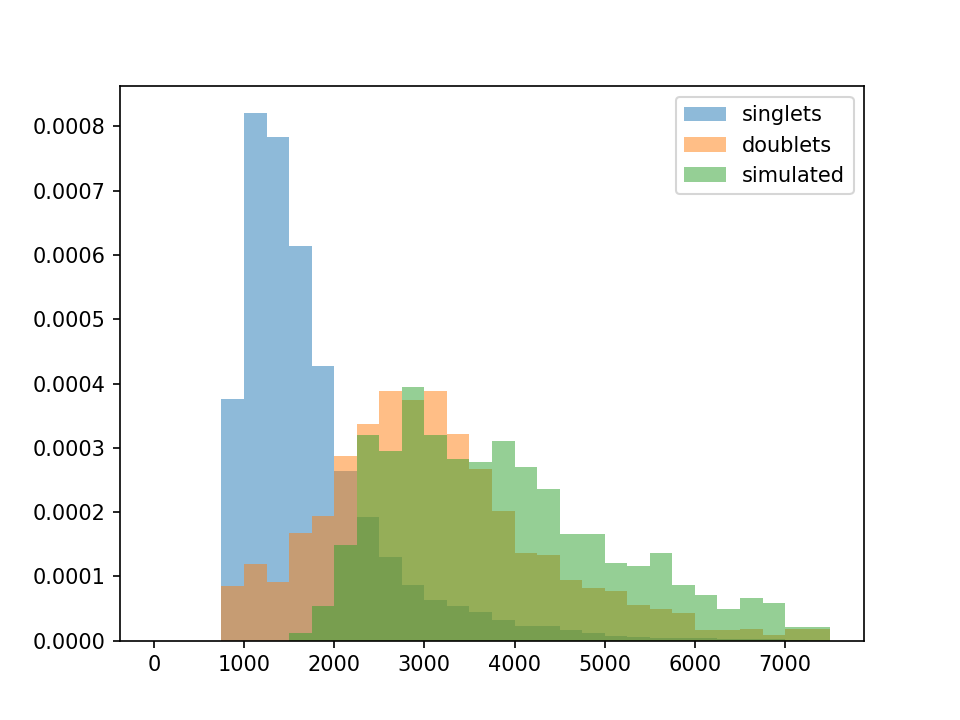

In [91]:
plt.figure()

feature = 'NUM_UMI'

plt.hist(meta[feature][singlets], 30, alpha=.5, range=(0, 7500), label='singlets', normed=True)
plt.hist(meta[feature][doublets], 30, alpha=.5, range=(0, 7500), label='doublets', normed=True)
plt.hist(simulated_doublets_umis, 30, alpha=.5, range=(0, 7500), label='simulated', normed=True)


plt.legend(loc='best')

<IPython.core.display.Javascript object>


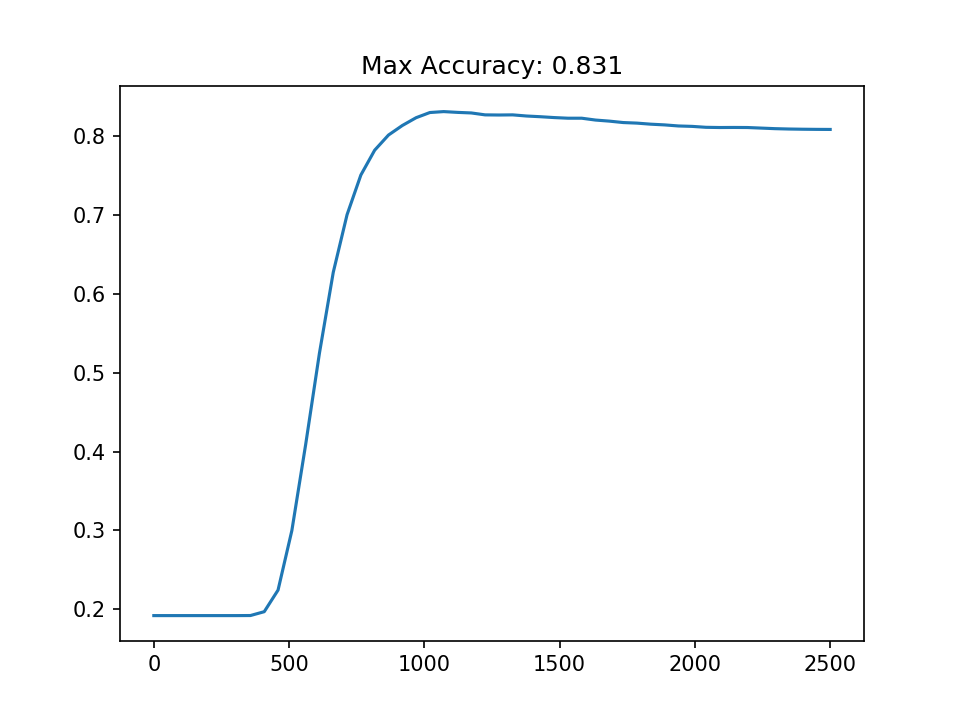

In [101]:
acc = [x['Accuracy'] for x in scores]
plt.figure()
plt.plot(thresholds, acc)

plt.title('Max Accuracy: {:.3f}'.format(np.max(acc)))